# Фильтр Боке

![result.png](Result)

In [150]:
import numpy as np
from matplotlib import pyplot as plt
import imageio.v2 as imageio
from scipy.signal import convolve2d
from skimage.transform import resize
from skimage.color import rgb2hsv, hsv2rgb

(0.0, 0.0006368918)

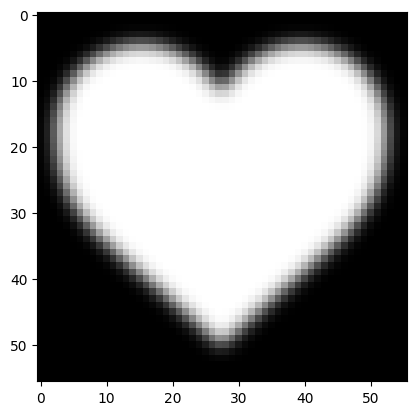

In [87]:
kernel = resize(imageio.imread('heart_kernel.png')[:,:,0], (56, 56)).astype(np.float32)
kernel /= np.sum(kernel)
plt.imshow(kernel, cmap='gray')
np.min(kernel), np.max(kernel)

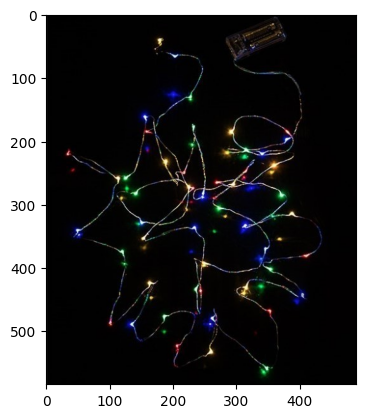

In [159]:
image = imageio.imread('lights.jpg').astype(np.float32) / 255.0
plt.imshow(image)

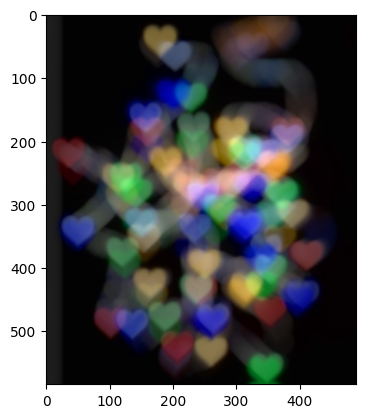

In [162]:
def convolve3d(source, filter, boundary='symm', mode='same'):
    channels = [convolve2d(source[:,:,i], filter, boundary=boundary, mode=mode) \
         for i in range(source.shape[2])]
    return np.stack(channels, axis=2)


def bokeh(image, kernel):
    result = np.copy(image)
    result = np.power(result, 2)
    result = convolve3d(result, kernel)
    result = np.sqrt(result)
    return result


def maximize_intensity(image):
    intense_image = image / np.max(image)
    image_hsv = rgb2hsv(intense_image)
    saturation_factor = 1.75
    image_hsv[:,:, 1] = np.clip(image_hsv[:,:, 1] * saturation_factor, 0.0, 1.0)
    return hsv2rgb(image_hsv)


result_image = bokeh(image, kernel)
result_image = maximize_intensity(result_image)
plt.imshow(result_image)